# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:13<00:00, 4.53KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


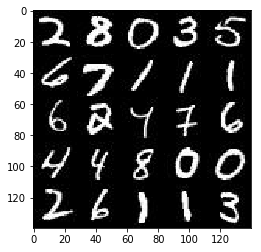

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

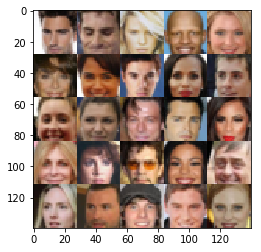

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # DONE: Implement Function
    # Real input images placeholder with rank 4 using image_width, image_height, and image_channels.
    real_input = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name='input_real')
    # Z input placeholder with rank 2 using z_dim.
    z_input = tf.placeholder(tf.float32, shape=(None, z_dim), name='z_input')
    # Learning rate placeholder with rank 0.
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return (real_input, z_input, learning_rate)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # DONE: Implement Function
    # This is basically the discriminator function as explained in lesson 2 - section 8
    # in the DLND course. Only the input shape is differend
    alpha = 0.2
        
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer shape 28x28x3 
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        #print(relu1.shape)
                
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        #print(relu2.shape)
                
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        #print(relu3.shape)
              
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        #print(logits.shape)
        out = tf.sigmoid(logits)
                              
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # DONE: Implement Function
    alpha = 0.2
    keep = 0.5
             
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # print(x1.shape)
                
        # Reshape to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(inputs=x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1) 
        #print(x1.shape)
   
        x2 = tf.layers.conv2d_transpose(x1, filters=128, kernel_size=5, strides=2, padding='same')   
        x2 = tf.layers.batch_normalization(inputs=x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.shape)
        
        x3 = tf.layers.conv2d_transpose(x2, filters=64, kernel_size=5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(inputs=x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3) 
        #print(x3.shape)
        
        drop = tf.nn.dropout(x3, keep_prob=keep)
               
        # Output layer
        logits = tf.layers.conv2d_transpose(drop, filters=out_channel_dim, kernel_size=5, strides=1, padding='same')
               
        #print(logits.shape) # 28x28x5
                               
        out = tf.tanh(logits)
            
        return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [42]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # DONE: Implement Function
    
    smooth = 0.05
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
  
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [43]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # DONE: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimize
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]

    with tf.control_dependencies(d_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
            
    # print(f"d_train_opt: {d_train_opt}")
    # print(f"g_train_opt: {g_train_opt}")
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [44]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [48]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    print_every=10 
    show_every=100
    
    _, width, height, channels = data_shape
    input_real, input_z, lr = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print(f"Epoch {epoch_i + 1}/{epochs}...",
                          f"Discriminator Loss: {train_loss_d:.4f}...",
                          f"Generator Loss: {train_loss_g:.4f}...", f"steps: {steps}")

                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                    
    print("Done training")

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.3911... Generator Loss: 5.9152... steps: 10
Epoch 1/2... Discriminator Loss: 3.6952... Generator Loss: 5.7475... steps: 20
Epoch 1/2... Discriminator Loss: 1.2778... Generator Loss: 1.4185... steps: 30
Epoch 1/2... Discriminator Loss: 0.9129... Generator Loss: 1.1884... steps: 40
Epoch 1/2... Discriminator Loss: 0.9716... Generator Loss: 1.5207... steps: 50
Epoch 1/2... Discriminator Loss: 0.8057... Generator Loss: 1.7042... steps: 60
Epoch 1/2... Discriminator Loss: 1.0250... Generator Loss: 1.2707... steps: 70
Epoch 1/2... Discriminator Loss: 0.9841... Generator Loss: 1.5300... steps: 80
Epoch 1/2... Discriminator Loss: 1.0470... Generator Loss: 1.9443... steps: 90
Epoch 1/2... Discriminator Loss: 0.9254... Generator Loss: 1.0307... steps: 100


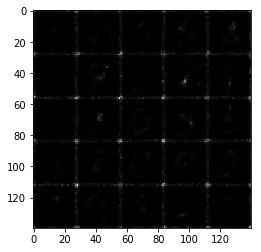

Epoch 1/2... Discriminator Loss: 0.7813... Generator Loss: 1.6901... steps: 110
Epoch 1/2... Discriminator Loss: 0.7290... Generator Loss: 1.5822... steps: 120
Epoch 1/2... Discriminator Loss: 0.8669... Generator Loss: 1.0356... steps: 130
Epoch 1/2... Discriminator Loss: 1.1293... Generator Loss: 0.6617... steps: 140
Epoch 1/2... Discriminator Loss: 0.8711... Generator Loss: 0.9726... steps: 150
Epoch 1/2... Discriminator Loss: 1.3033... Generator Loss: 0.5277... steps: 160
Epoch 1/2... Discriminator Loss: 1.0659... Generator Loss: 0.8456... steps: 170
Epoch 1/2... Discriminator Loss: 1.0479... Generator Loss: 1.4558... steps: 180
Epoch 1/2... Discriminator Loss: 1.0433... Generator Loss: 1.1210... steps: 190
Epoch 1/2... Discriminator Loss: 0.9016... Generator Loss: 1.1206... steps: 200


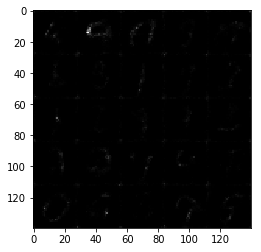

Epoch 1/2... Discriminator Loss: 1.0804... Generator Loss: 0.7791... steps: 210
Epoch 1/2... Discriminator Loss: 1.0502... Generator Loss: 1.4345... steps: 220
Epoch 1/2... Discriminator Loss: 1.0678... Generator Loss: 0.7559... steps: 230
Epoch 1/2... Discriminator Loss: 1.0404... Generator Loss: 1.1154... steps: 240
Epoch 1/2... Discriminator Loss: 1.0275... Generator Loss: 0.8170... steps: 250
Epoch 1/2... Discriminator Loss: 1.0204... Generator Loss: 1.1496... steps: 260
Epoch 1/2... Discriminator Loss: 1.2509... Generator Loss: 0.5997... steps: 270
Epoch 1/2... Discriminator Loss: 1.0812... Generator Loss: 0.7378... steps: 280
Epoch 1/2... Discriminator Loss: 0.9403... Generator Loss: 1.1212... steps: 290
Epoch 1/2... Discriminator Loss: 0.9960... Generator Loss: 0.8315... steps: 300


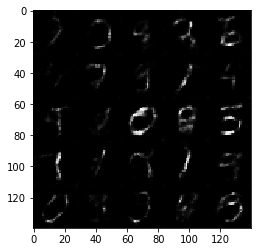

Epoch 1/2... Discriminator Loss: 1.0732... Generator Loss: 1.2246... steps: 310
Epoch 1/2... Discriminator Loss: 1.0644... Generator Loss: 1.7113... steps: 320
Epoch 1/2... Discriminator Loss: 1.0701... Generator Loss: 1.5336... steps: 330
Epoch 1/2... Discriminator Loss: 0.8921... Generator Loss: 1.0242... steps: 340
Epoch 1/2... Discriminator Loss: 0.9651... Generator Loss: 0.9882... steps: 350
Epoch 1/2... Discriminator Loss: 0.9651... Generator Loss: 1.3596... steps: 360
Epoch 1/2... Discriminator Loss: 0.9213... Generator Loss: 1.6379... steps: 370
Epoch 1/2... Discriminator Loss: 0.9597... Generator Loss: 1.2297... steps: 380
Epoch 1/2... Discriminator Loss: 0.9208... Generator Loss: 1.3212... steps: 390
Epoch 1/2... Discriminator Loss: 1.1802... Generator Loss: 1.7948... steps: 400


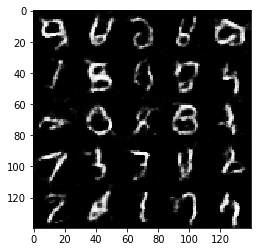

Epoch 1/2... Discriminator Loss: 1.0312... Generator Loss: 0.8003... steps: 410
Epoch 1/2... Discriminator Loss: 0.9842... Generator Loss: 0.9841... steps: 420
Epoch 1/2... Discriminator Loss: 0.9180... Generator Loss: 1.3097... steps: 430
Epoch 1/2... Discriminator Loss: 0.9441... Generator Loss: 1.7139... steps: 440
Epoch 1/2... Discriminator Loss: 1.1788... Generator Loss: 0.6177... steps: 450
Epoch 1/2... Discriminator Loss: 0.8702... Generator Loss: 1.3134... steps: 460
Epoch 2/2... Discriminator Loss: 1.1647... Generator Loss: 0.7570... steps: 470
Epoch 2/2... Discriminator Loss: 0.9055... Generator Loss: 1.1138... steps: 480
Epoch 2/2... Discriminator Loss: 0.9597... Generator Loss: 1.3124... steps: 490
Epoch 2/2... Discriminator Loss: 0.9393... Generator Loss: 1.1755... steps: 500


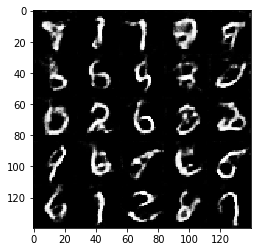

Epoch 2/2... Discriminator Loss: 0.9085... Generator Loss: 1.8562... steps: 510
Epoch 2/2... Discriminator Loss: 0.8825... Generator Loss: 1.1850... steps: 520
Epoch 2/2... Discriminator Loss: 1.3179... Generator Loss: 0.4991... steps: 530
Epoch 2/2... Discriminator Loss: 0.9816... Generator Loss: 1.6465... steps: 540
Epoch 2/2... Discriminator Loss: 0.9946... Generator Loss: 0.8129... steps: 550
Epoch 2/2... Discriminator Loss: 1.0220... Generator Loss: 0.6735... steps: 560
Epoch 2/2... Discriminator Loss: 0.9876... Generator Loss: 1.0932... steps: 570
Epoch 2/2... Discriminator Loss: 0.9254... Generator Loss: 0.9090... steps: 580
Epoch 2/2... Discriminator Loss: 0.8804... Generator Loss: 1.5506... steps: 590
Epoch 2/2... Discriminator Loss: 0.9991... Generator Loss: 1.0680... steps: 600


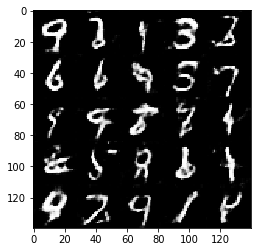

Epoch 2/2... Discriminator Loss: 1.4051... Generator Loss: 0.4723... steps: 610
Epoch 2/2... Discriminator Loss: 1.6712... Generator Loss: 0.3683... steps: 620
Epoch 2/2... Discriminator Loss: 1.2744... Generator Loss: 0.5994... steps: 630
Epoch 2/2... Discriminator Loss: 1.1112... Generator Loss: 0.6651... steps: 640
Epoch 2/2... Discriminator Loss: 0.8398... Generator Loss: 2.0952... steps: 650
Epoch 2/2... Discriminator Loss: 1.2628... Generator Loss: 0.5583... steps: 660
Epoch 2/2... Discriminator Loss: 0.8766... Generator Loss: 1.5224... steps: 670
Epoch 2/2... Discriminator Loss: 1.3319... Generator Loss: 2.2437... steps: 680
Epoch 2/2... Discriminator Loss: 1.5154... Generator Loss: 0.4097... steps: 690
Epoch 2/2... Discriminator Loss: 1.1947... Generator Loss: 0.6217... steps: 700


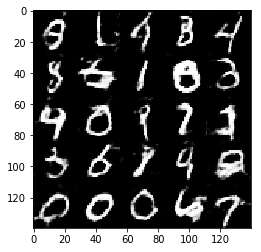

Epoch 2/2... Discriminator Loss: 1.0837... Generator Loss: 2.0117... steps: 710
Epoch 2/2... Discriminator Loss: 0.9656... Generator Loss: 0.8869... steps: 720
Epoch 2/2... Discriminator Loss: 1.2001... Generator Loss: 2.6318... steps: 730
Epoch 2/2... Discriminator Loss: 1.1837... Generator Loss: 0.5927... steps: 740
Epoch 2/2... Discriminator Loss: 0.6885... Generator Loss: 2.0331... steps: 750
Epoch 2/2... Discriminator Loss: 1.1468... Generator Loss: 2.4304... steps: 760
Epoch 2/2... Discriminator Loss: 0.8738... Generator Loss: 0.9696... steps: 770
Epoch 2/2... Discriminator Loss: 2.3740... Generator Loss: 3.6509... steps: 780
Epoch 2/2... Discriminator Loss: 0.9721... Generator Loss: 1.1622... steps: 790
Epoch 2/2... Discriminator Loss: 0.7944... Generator Loss: 1.5028... steps: 800


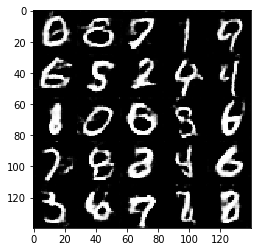

Epoch 2/2... Discriminator Loss: 0.7425... Generator Loss: 1.2775... steps: 810
Epoch 2/2... Discriminator Loss: 0.9165... Generator Loss: 2.0375... steps: 820
Epoch 2/2... Discriminator Loss: 0.9594... Generator Loss: 1.3509... steps: 830
Epoch 2/2... Discriminator Loss: 0.9177... Generator Loss: 1.0740... steps: 840
Epoch 2/2... Discriminator Loss: 1.3926... Generator Loss: 3.0061... steps: 850
Epoch 2/2... Discriminator Loss: 0.7361... Generator Loss: 1.7941... steps: 860
Epoch 2/2... Discriminator Loss: 0.6409... Generator Loss: 1.4647... steps: 870
Epoch 2/2... Discriminator Loss: 1.0379... Generator Loss: 0.9131... steps: 880
Epoch 2/2... Discriminator Loss: 1.0753... Generator Loss: 2.0699... steps: 890
Epoch 2/2... Discriminator Loss: 0.8682... Generator Loss: 1.8004... steps: 900


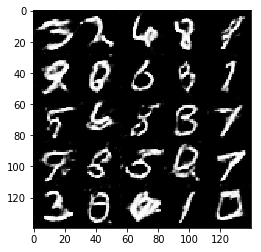

Epoch 2/2... Discriminator Loss: 0.9063... Generator Loss: 0.8734... steps: 910
Epoch 2/2... Discriminator Loss: 1.2566... Generator Loss: 0.5668... steps: 920
Epoch 2/2... Discriminator Loss: 0.7713... Generator Loss: 1.2247... steps: 930
Done training


In [59]:
batch_size = 128
z_dim = 150
learning_rate = 0.0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.1723... Generator Loss: 0.9620... steps: 10
Epoch 1/1... Discriminator Loss: 3.0135... Generator Loss: 0.1534... steps: 20
Epoch 1/1... Discriminator Loss: 0.9072... Generator Loss: 1.1708... steps: 30
Epoch 1/1... Discriminator Loss: 0.4416... Generator Loss: 3.3602... steps: 40
Epoch 1/1... Discriminator Loss: 0.4587... Generator Loss: 2.1687... steps: 50
Epoch 1/1... Discriminator Loss: 0.2651... Generator Loss: 3.7051... steps: 60
Epoch 1/1... Discriminator Loss: 0.2518... Generator Loss: 3.9506... steps: 70
Epoch 1/1... Discriminator Loss: 1.1245... Generator Loss: 1.4027... steps: 80
Epoch 1/1... Discriminator Loss: 0.4613... Generator Loss: 3.1108... steps: 90
Epoch 1/1... Discriminator Loss: 1.6949... Generator Loss: 0.4356... steps: 100


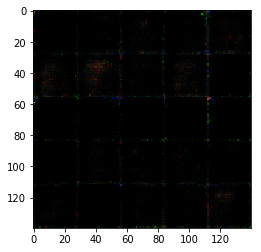

Epoch 1/1... Discriminator Loss: 0.4695... Generator Loss: 3.5789... steps: 110
Epoch 1/1... Discriminator Loss: 0.6786... Generator Loss: 1.5052... steps: 120
Epoch 1/1... Discriminator Loss: 2.3225... Generator Loss: 4.1960... steps: 130
Epoch 1/1... Discriminator Loss: 1.0096... Generator Loss: 0.7661... steps: 140
Epoch 1/1... Discriminator Loss: 2.0415... Generator Loss: 2.8406... steps: 150
Epoch 1/1... Discriminator Loss: 0.9883... Generator Loss: 0.9399... steps: 160
Epoch 1/1... Discriminator Loss: 1.3135... Generator Loss: 0.5372... steps: 170
Epoch 1/1... Discriminator Loss: 1.0429... Generator Loss: 0.7394... steps: 180
Epoch 1/1... Discriminator Loss: 0.9717... Generator Loss: 1.6484... steps: 190
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 0.4709... steps: 200


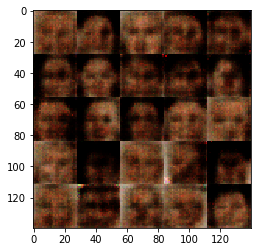

Epoch 1/1... Discriminator Loss: 1.7277... Generator Loss: 0.3387... steps: 210
Epoch 1/1... Discriminator Loss: 0.9107... Generator Loss: 0.9618... steps: 220
Epoch 1/1... Discriminator Loss: 1.0438... Generator Loss: 2.1039... steps: 230
Epoch 1/1... Discriminator Loss: 0.7685... Generator Loss: 1.9321... steps: 240
Epoch 1/1... Discriminator Loss: 2.3737... Generator Loss: 0.1719... steps: 250
Epoch 1/1... Discriminator Loss: 1.2074... Generator Loss: 1.4435... steps: 260
Epoch 1/1... Discriminator Loss: 0.8189... Generator Loss: 1.5754... steps: 270
Epoch 1/1... Discriminator Loss: 0.9981... Generator Loss: 1.1986... steps: 280
Epoch 1/1... Discriminator Loss: 0.9243... Generator Loss: 1.7797... steps: 290
Epoch 1/1... Discriminator Loss: 1.8072... Generator Loss: 0.2585... steps: 300


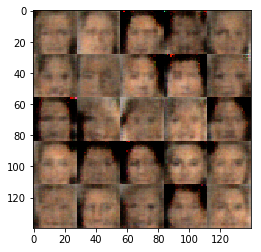

Epoch 1/1... Discriminator Loss: 0.9641... Generator Loss: 0.9434... steps: 310
Epoch 1/1... Discriminator Loss: 0.9100... Generator Loss: 1.2818... steps: 320
Epoch 1/1... Discriminator Loss: 1.2311... Generator Loss: 0.6185... steps: 330
Epoch 1/1... Discriminator Loss: 2.8027... Generator Loss: 3.3736... steps: 340
Epoch 1/1... Discriminator Loss: 1.2042... Generator Loss: 1.0266... steps: 350
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 0.5787... steps: 360
Epoch 1/1... Discriminator Loss: 1.1039... Generator Loss: 0.9282... steps: 370
Epoch 1/1... Discriminator Loss: 1.0592... Generator Loss: 1.2406... steps: 380
Epoch 1/1... Discriminator Loss: 1.0818... Generator Loss: 1.6725... steps: 390
Epoch 1/1... Discriminator Loss: 0.9851... Generator Loss: 1.5146... steps: 400


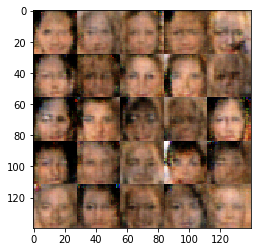

Epoch 1/1... Discriminator Loss: 1.0104... Generator Loss: 1.1204... steps: 410
Epoch 1/1... Discriminator Loss: 1.1431... Generator Loss: 1.1101... steps: 420
Epoch 1/1... Discriminator Loss: 1.4492... Generator Loss: 0.4860... steps: 430
Epoch 1/1... Discriminator Loss: 1.2483... Generator Loss: 0.7813... steps: 440
Epoch 1/1... Discriminator Loss: 1.2201... Generator Loss: 0.7072... steps: 450
Epoch 1/1... Discriminator Loss: 1.1872... Generator Loss: 0.8481... steps: 460
Epoch 1/1... Discriminator Loss: 1.1972... Generator Loss: 1.5564... steps: 470
Epoch 1/1... Discriminator Loss: 1.5108... Generator Loss: 0.4019... steps: 480
Epoch 1/1... Discriminator Loss: 1.1195... Generator Loss: 1.1372... steps: 490
Epoch 1/1... Discriminator Loss: 1.2926... Generator Loss: 0.9041... steps: 500


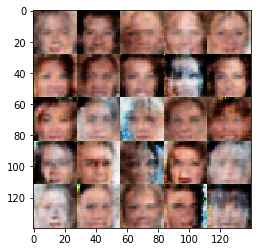

Epoch 1/1... Discriminator Loss: 1.4107... Generator Loss: 0.5472... steps: 510
Epoch 1/1... Discriminator Loss: 1.1984... Generator Loss: 0.9674... steps: 520
Epoch 1/1... Discriminator Loss: 1.5134... Generator Loss: 1.9029... steps: 530
Epoch 1/1... Discriminator Loss: 1.2883... Generator Loss: 1.7387... steps: 540
Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 0.7028... steps: 550
Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 0.9309... steps: 560
Epoch 1/1... Discriminator Loss: 1.0973... Generator Loss: 0.7742... steps: 570
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.5528... steps: 580
Epoch 1/1... Discriminator Loss: 1.6768... Generator Loss: 1.8619... steps: 590
Epoch 1/1... Discriminator Loss: 1.2808... Generator Loss: 0.8520... steps: 600


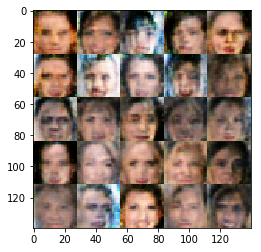

Epoch 1/1... Discriminator Loss: 1.1532... Generator Loss: 0.9011... steps: 610
Epoch 1/1... Discriminator Loss: 1.3368... Generator Loss: 0.9538... steps: 620
Epoch 1/1... Discriminator Loss: 1.4644... Generator Loss: 0.5446... steps: 630
Epoch 1/1... Discriminator Loss: 1.3190... Generator Loss: 1.0494... steps: 640
Epoch 1/1... Discriminator Loss: 1.4713... Generator Loss: 0.6784... steps: 650
Epoch 1/1... Discriminator Loss: 1.2352... Generator Loss: 0.7922... steps: 660
Epoch 1/1... Discriminator Loss: 1.7067... Generator Loss: 0.3589... steps: 670
Epoch 1/1... Discriminator Loss: 1.4044... Generator Loss: 1.0396... steps: 680
Epoch 1/1... Discriminator Loss: 1.2235... Generator Loss: 0.8964... steps: 690
Epoch 1/1... Discriminator Loss: 1.3443... Generator Loss: 1.0447... steps: 700


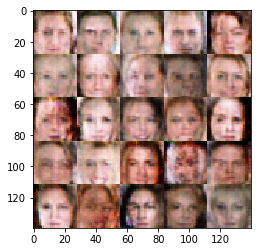

Epoch 1/1... Discriminator Loss: 1.1111... Generator Loss: 1.3693... steps: 710
Epoch 1/1... Discriminator Loss: 1.5393... Generator Loss: 0.5036... steps: 720
Epoch 1/1... Discriminator Loss: 1.2693... Generator Loss: 0.6328... steps: 730
Epoch 1/1... Discriminator Loss: 1.7829... Generator Loss: 0.3722... steps: 740
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.7772... steps: 750
Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 0.7787... steps: 760
Epoch 1/1... Discriminator Loss: 1.3425... Generator Loss: 0.9381... steps: 770
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.6216... steps: 780
Epoch 1/1... Discriminator Loss: 1.4660... Generator Loss: 1.0790... steps: 790
Epoch 1/1... Discriminator Loss: 1.4428... Generator Loss: 0.5655... steps: 800


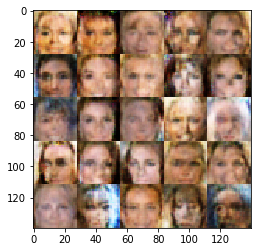

Epoch 1/1... Discriminator Loss: 1.2764... Generator Loss: 1.0080... steps: 810
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.7808... steps: 820
Epoch 1/1... Discriminator Loss: 1.3550... Generator Loss: 0.9524... steps: 830
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.8833... steps: 840
Epoch 1/1... Discriminator Loss: 1.3150... Generator Loss: 0.8479... steps: 850
Epoch 1/1... Discriminator Loss: 1.1833... Generator Loss: 0.8719... steps: 860
Epoch 1/1... Discriminator Loss: 1.5091... Generator Loss: 0.9052... steps: 870
Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 0.6145... steps: 880
Epoch 1/1... Discriminator Loss: 1.2844... Generator Loss: 0.7739... steps: 890
Epoch 1/1... Discriminator Loss: 1.4108... Generator Loss: 0.9228... steps: 900


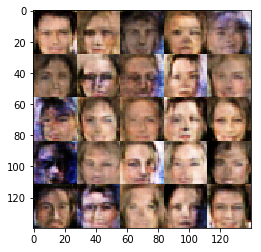

Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.8773... steps: 910
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.5216... steps: 920
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.7042... steps: 930
Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 0.9324... steps: 940
Epoch 1/1... Discriminator Loss: 1.3301... Generator Loss: 0.7038... steps: 950
Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.8279... steps: 960
Epoch 1/1... Discriminator Loss: 1.4324... Generator Loss: 0.9198... steps: 970
Epoch 1/1... Discriminator Loss: 1.4228... Generator Loss: 0.5580... steps: 980
Epoch 1/1... Discriminator Loss: 1.4630... Generator Loss: 0.5618... steps: 990
Epoch 1/1... Discriminator Loss: 1.4347... Generator Loss: 0.5501... steps: 1000


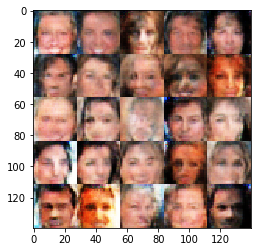

Epoch 1/1... Discriminator Loss: 1.2598... Generator Loss: 0.6484... steps: 1010
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 1.2454... steps: 1020
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 0.8209... steps: 1030
Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 1.0478... steps: 1040
Epoch 1/1... Discriminator Loss: 1.4823... Generator Loss: 0.4686... steps: 1050
Epoch 1/1... Discriminator Loss: 1.1226... Generator Loss: 0.8015... steps: 1060
Epoch 1/1... Discriminator Loss: 1.5496... Generator Loss: 0.3889... steps: 1070
Epoch 1/1... Discriminator Loss: 1.4374... Generator Loss: 0.5809... steps: 1080
Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 0.7847... steps: 1090
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.9921... steps: 1100


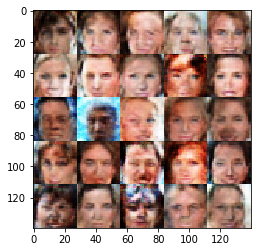

Epoch 1/1... Discriminator Loss: 1.2067... Generator Loss: 1.1864... steps: 1110
Epoch 1/1... Discriminator Loss: 1.3512... Generator Loss: 0.5674... steps: 1120
Epoch 1/1... Discriminator Loss: 1.2313... Generator Loss: 0.8031... steps: 1130
Epoch 1/1... Discriminator Loss: 1.2132... Generator Loss: 0.8316... steps: 1140
Epoch 1/1... Discriminator Loss: 1.1042... Generator Loss: 1.0662... steps: 1150
Epoch 1/1... Discriminator Loss: 1.2121... Generator Loss: 0.7827... steps: 1160
Epoch 1/1... Discriminator Loss: 1.2870... Generator Loss: 1.0195... steps: 1170
Epoch 1/1... Discriminator Loss: 1.4123... Generator Loss: 0.5009... steps: 1180
Epoch 1/1... Discriminator Loss: 1.4027... Generator Loss: 0.6768... steps: 1190
Epoch 1/1... Discriminator Loss: 1.1927... Generator Loss: 0.8406... steps: 1200


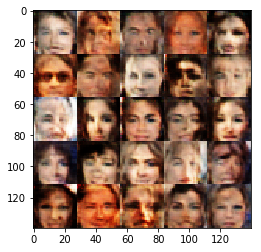

Epoch 1/1... Discriminator Loss: 1.3501... Generator Loss: 0.6449... steps: 1210
Epoch 1/1... Discriminator Loss: 1.2793... Generator Loss: 0.5977... steps: 1220
Epoch 1/1... Discriminator Loss: 1.2127... Generator Loss: 1.1015... steps: 1230
Epoch 1/1... Discriminator Loss: 1.2298... Generator Loss: 0.9370... steps: 1240
Epoch 1/1... Discriminator Loss: 1.3605... Generator Loss: 0.6127... steps: 1250
Epoch 1/1... Discriminator Loss: 1.2114... Generator Loss: 1.0317... steps: 1260
Epoch 1/1... Discriminator Loss: 1.1991... Generator Loss: 0.7949... steps: 1270
Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.9519... steps: 1280
Epoch 1/1... Discriminator Loss: 1.2538... Generator Loss: 0.8771... steps: 1290
Epoch 1/1... Discriminator Loss: 1.2593... Generator Loss: 1.0585... steps: 1300


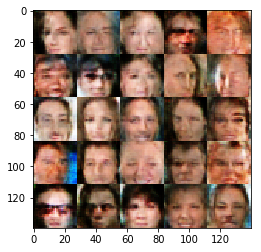

Epoch 1/1... Discriminator Loss: 1.2883... Generator Loss: 0.6177... steps: 1310
Epoch 1/1... Discriminator Loss: 1.3491... Generator Loss: 0.9816... steps: 1320
Epoch 1/1... Discriminator Loss: 1.3004... Generator Loss: 0.6340... steps: 1330
Epoch 1/1... Discriminator Loss: 1.2283... Generator Loss: 0.7820... steps: 1340
Epoch 1/1... Discriminator Loss: 1.2312... Generator Loss: 0.7686... steps: 1350
Epoch 1/1... Discriminator Loss: 1.2336... Generator Loss: 0.8846... steps: 1360
Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.4755... steps: 1370
Epoch 1/1... Discriminator Loss: 1.6112... Generator Loss: 0.3351... steps: 1380
Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 0.9534... steps: 1390
Epoch 1/1... Discriminator Loss: 1.2426... Generator Loss: 0.8074... steps: 1400


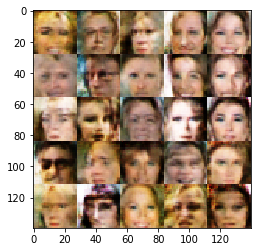

Epoch 1/1... Discriminator Loss: 1.4805... Generator Loss: 0.4167... steps: 1410
Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 0.7566... steps: 1420
Epoch 1/1... Discriminator Loss: 1.2286... Generator Loss: 0.9468... steps: 1430
Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 0.7011... steps: 1440
Epoch 1/1... Discriminator Loss: 1.2127... Generator Loss: 0.7433... steps: 1450
Epoch 1/1... Discriminator Loss: 1.2091... Generator Loss: 1.0229... steps: 1460
Epoch 1/1... Discriminator Loss: 1.4577... Generator Loss: 0.4336... steps: 1470
Epoch 1/1... Discriminator Loss: 1.5474... Generator Loss: 0.3979... steps: 1480
Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 0.7093... steps: 1490
Epoch 1/1... Discriminator Loss: 1.4827... Generator Loss: 0.4088... steps: 1500


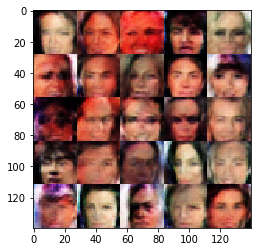

Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 0.5839... steps: 1510
Epoch 1/1... Discriminator Loss: 1.1558... Generator Loss: 0.7591... steps: 1520
Epoch 1/1... Discriminator Loss: 1.3397... Generator Loss: 0.8964... steps: 1530
Epoch 1/1... Discriminator Loss: 1.3436... Generator Loss: 0.6489... steps: 1540
Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 0.5266... steps: 1550
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.5314... steps: 1560
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 0.6777... steps: 1570
Epoch 1/1... Discriminator Loss: 1.2318... Generator Loss: 0.8190... steps: 1580
Done training


In [60]:
batch_size = 128
z_dim = 150
learning_rate = 0.0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.